In [5]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
from IPython.display import Image, display
from wordcloud import WordCloud

from konlpy.tag import Mecab

from collections import Counter


In [6]:
if sys.platform == 'win32':
    mecab = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")
else:
    mecab = Mecab()

In [7]:
sample = "개봉했을때부터 지금까지 마음이답답하거나 힘들때 이영화 보고있어요 그때마다 심적인 위로를 받을수있는영화같아요 장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다. 알잘딱깔센"

In [8]:
mecab.morphs(sample)

['개봉',
 '했',
 '을',
 '때',
 '부터',
 '지금',
 '까지',
 '마음',
 '이',
 '답답',
 '하',
 '거나',
 '힘들',
 '때',
 '이',
 '영화',
 '보',
 '고',
 '있',
 '어요',
 '그때',
 '마다',
 '심',
 '적',
 '인',
 '위로',
 '를',
 '받',
 '을',
 '수',
 '있',
 '는',
 '영화',
 '같',
 '아요',
 '장면',
 '하나하나',
 '가',
 '너무',
 '예쁘',
 '고',
 '마음',
 '에',
 '남',
 '아서',
 '진한',
 '여운',
 '까지',
 '주',
 '는',
 '영화',
 '감사',
 '합니다',
 '.',
 '알',
 '잘',
 '딱',
 '깔',
 '센']

In [9]:
mecab.pos(sample)

[('개봉', 'NNG'),
 ('했', 'XSV+EP'),
 ('을', 'ETM'),
 ('때', 'NNG'),
 ('부터', 'JX'),
 ('지금', 'NNG'),
 ('까지', 'JX'),
 ('마음', 'NNG'),
 ('이', 'JKS'),
 ('답답', 'XR'),
 ('하', 'XSA'),
 ('거나', 'EC'),
 ('힘들', 'VA+ETM'),
 ('때', 'NNG'),
 ('이', 'MM'),
 ('영화', 'NNG'),
 ('보', 'VV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('어요', 'EF'),
 ('그때', 'NNG'),
 ('마다', 'JX'),
 ('심', 'NNG'),
 ('적', 'XSN'),
 ('인', 'VCP+ETM'),
 ('위로', 'NNG'),
 ('를', 'JKO'),
 ('받', 'VV'),
 ('을', 'ETM'),
 ('수', 'NNB'),
 ('있', 'VV'),
 ('는', 'ETM'),
 ('영화', 'NNG'),
 ('같', 'VA'),
 ('아요', 'EF'),
 ('장면', 'NNG'),
 ('하나하나', 'NNG'),
 ('가', 'JKS'),
 ('너무', 'MAG'),
 ('예쁘', 'VA'),
 ('고', 'EC'),
 ('마음', 'NNG'),
 ('에', 'JKB'),
 ('남', 'VV'),
 ('아서', 'EC'),
 ('진한', 'VA+ETM'),
 ('여운', 'NNG'),
 ('까지', 'JX'),
 ('주', 'VX'),
 ('는', 'ETM'),
 ('영화', 'NNG'),
 ('감사', 'NNG'),
 ('합니다', 'XSV+EF'),
 ('.', 'SF'),
 ('알', 'NNG'),
 ('잘', 'MAG'),
 ('딱', 'MAG'),
 ('깔', 'VV+ETM'),
 ('센', 'NNG')]

In [10]:
mecab.nouns(sample)

['개봉',
 '때',
 '지금',
 '마음',
 '때',
 '영화',
 '그때',
 '심',
 '위로',
 '수',
 '영화',
 '장면',
 '하나하나',
 '마음',
 '여운',
 '영화',
 '감사',
 '알',
 '센']

In [11]:
with open('대한민국헌법.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    print(text)

대한민국헌법
[시행 1988. 2. 25] [헌법 제10호, 1987. 10. 29, 전부개정]

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다. 
       제1장 총강 
제1조 ①대한민국은 민주공화국이다.
  ②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
제2조 ①대한민국의 국민이 되는 요건은 법률로 정한다.
  ②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
제5조 ①대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
  ②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
제6조 ①헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
  ②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
제7조 ①공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
  ②공무원의 신분과 정치적 중립성은 법률이 정하는 바

In [15]:
mecab.nouns(text)
nouns = mecab.nouns(text)

In [22]:
with open('stopwords-ko.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()

    for i, v in enumerate(stopwords):
        stopwords[i] = v.strip()

    #print(stopwords)

In [24]:
data_set = []

for v in nouns:
    if v not in stopwords:
        data_set.append(v)

print(data_set)

['대한민국', '헌법', '시행', '헌법', '호', '개정', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시', '정부', '법통', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입각', '정의', '인도', '동포', '애', '민족', '단결', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유', '민주', '기본', '질서', '정치', '경제', '사회', '문화', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '균등', '향상', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '자손', '안전', '자유', '행복', '확보', '짐', '제정', '차', '개정', '헌법', '국회', '의결', '국민', '투표', '개정', '장', '총강', '대한민국', '민주', '공화국', '대한민국', '주권', '국민', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외', '국민', '보호', '의무', '대한민국', '영토', '한반도', '부속', '대한민국', '통일', '지향', '자유', '민주', '기본', '질서', '입각', '평화', '통일', '정책', '수립', '추진', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전', '보장', '국토방위', '신성', '의무', '수행', '사명', '정치', '중립', '준수', '헌법', '체결', '공포', '조약', '일반', '승인', '국제', '법규', '국내법', '효력', '외국인', '국제법', '조약', '지위', '보장', '공무원', '국민', '전체', '봉사자', '국

In [26]:
count = Counter(data_set)
count

Counter({'법률': 121,
         '대통령': 84,
         '국가': 73,
         '헌법': 69,
         '국민': 69,
         '국회': 69,
         '필요': 31,
         '위원': 30,
         '법원': 25,
         '보장': 24,
         '정부': 23,
         '사항': 23,
         '국무': 23,
         '자유': 21,
         '권리': 21,
         '선거': 21,
         '의원': 21,
         '회의': 21,
         '경제': 20,
         '국회의원': 20,
         '의무': 19,
         '직무': 19,
         '국무총리': 19,
         '임명': 19,
         '조직': 18,
         '임기': 18,
         '의결': 17,
         '공무원': 17,
         '경우': 17,
         '장': 16,
         '범위': 16,
         '보호': 15,
         '법관': 15,
         '정책': 14,
         '정당': 14,
         '재판소': 14,
         '시행': 13,
         '노력': 13,
         '재판': 13,
         '단체': 13,
         '요구': 13,
         '심판': 12,
         '집회': 12,
         '군사': 12,
         '재': 12,
         '과반수': 12,
         '출석': 12,
         '찬성': 12,
         '자문': 12,
         '대한민국': 11,
         '안': 11,
         '안전': 11,
    

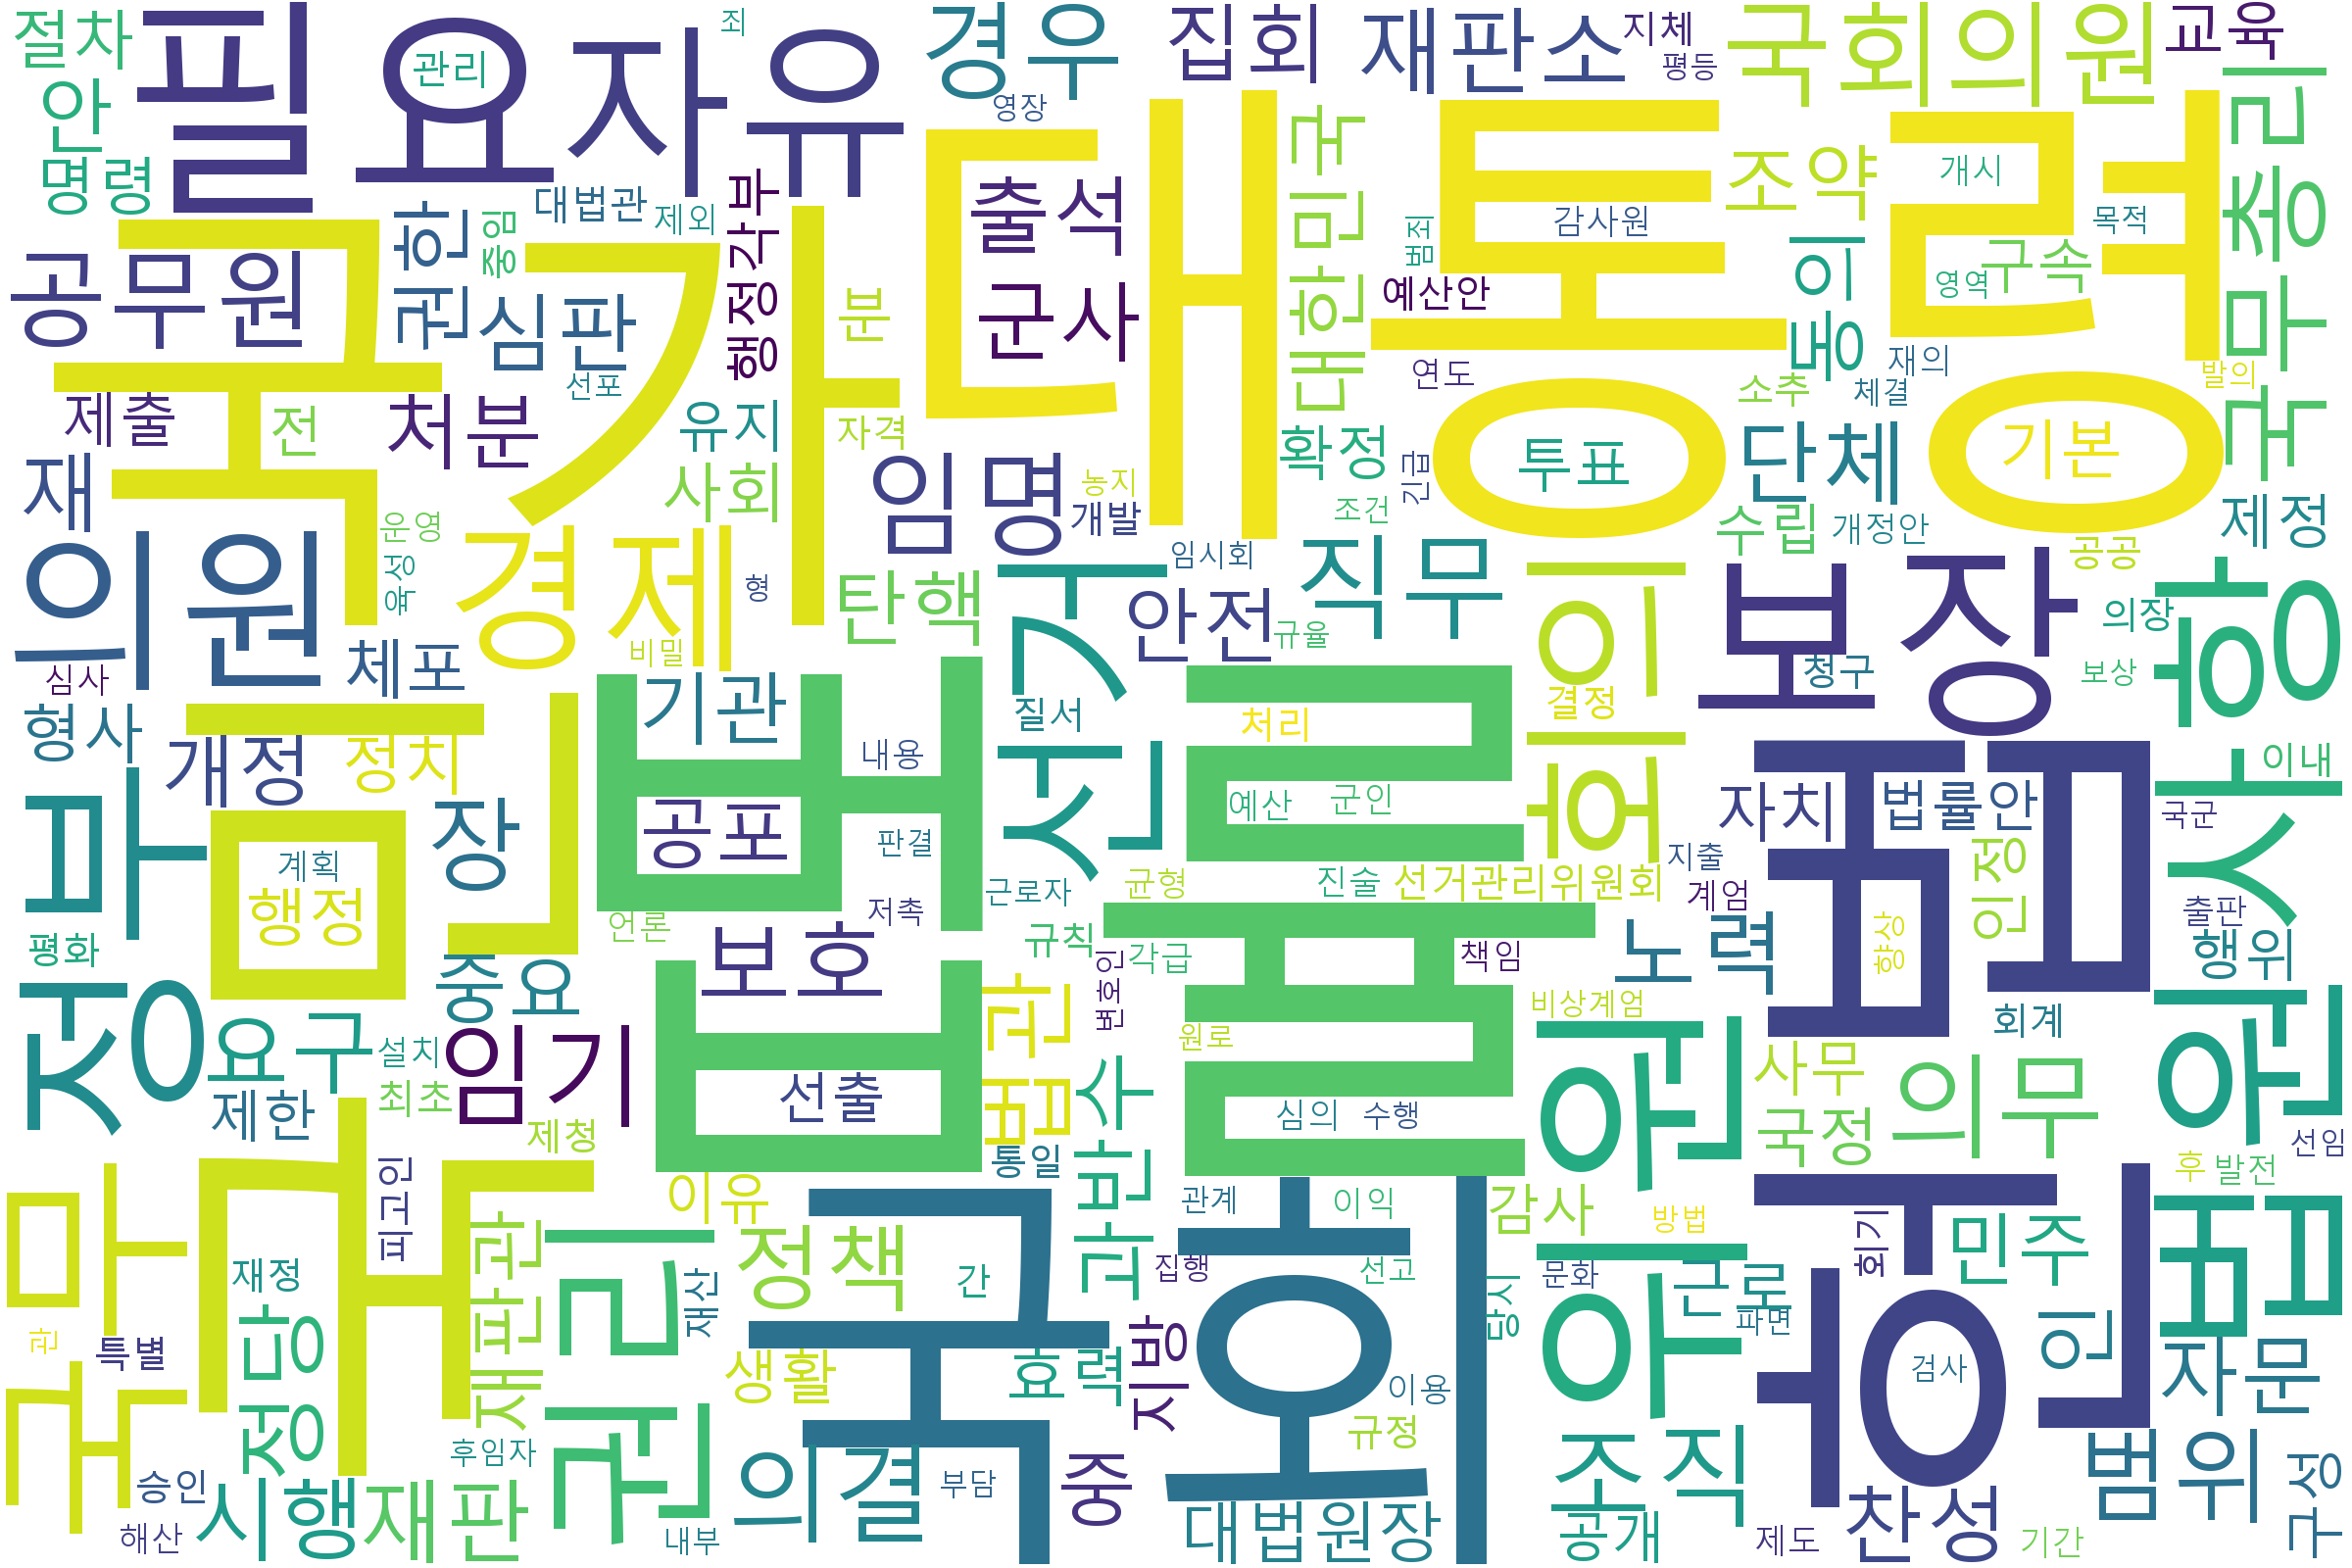

In [27]:
wc = WordCloud(font_path="../../Fonts/malgun.ttf",
               width=1200, height=800, scale=2.0,
               background_color='#ffffff')

wc = wc.generate_from_frequencies(count)
wc.to_file('대한민국헌법-주요단어.png')
display(Image(filename='대한민국헌법-주요단어.png'))